# <center><a href='https://colab.research.google.com/github/fortierq/itc1/blob/master/files/5_graph/3_traversal/bfs/code_bfs.ipynb'>Code : parcours en largeur <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Graphe de test

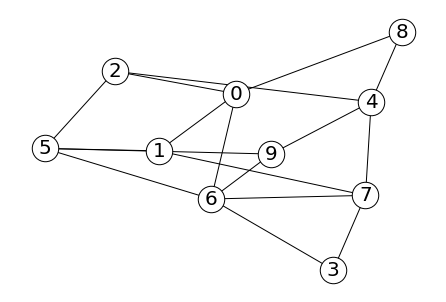

In [1]:
import networkx as nx

options = {"font_size": 20, "node_size": 700, "edgecolors": "black"}
G = nx.fast_gnp_random_graph(10, 0.35)
nx.draw(G, with_labels=True, node_color="white", **options)

## BFS avec file

In [2]:
from collections import deque

def bfs(G, s):
    visited = [False]*len(G)
    file = deque([s])
    while len(file) > 0:
        u = file.pop()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                file.appendleft(v)

bfs(G, 0)

0 1 2 6 8 5 7 4 3 9 

## BFS avec 2 couches

In [3]:
def bfs(G, s):
    visited = [False]*len(G)
    cur, next = [s], []
    while len(cur) + len(next) > 0: # on s'arrête quand les 2 sont vides
        if len(cur) == 0:
            cur, next = next, []
        u = cur.pop()
        if not visited[u]:
            visited[u] = True
            print(u, end=" ")
            for v in G[u]:
                next.append(v)

bfs(G, 0)

0 8 6 2 1 7 5 4 9 3 

## Application : calcul de distance

In [4]:
def distances(G, s):
    dist = [-1]*len(G)
    file = deque([(s, 0)])
    while len(file) > 0:
        u, d = file.pop()
        if dist[u] == -1:
            dist[u] = d
            for v in G[u]:
                file.appendleft((v, d + 1))
    return dist

distances(G, 0)

[0, 1, 1, 2, 2, 2, 1, 2, 1, 2]

## Application : calcul de plus court chemin

In [5]:
def bfs(G, s):
    pred = [-1]*len(G)
    file = deque([(s, s)])
    while len(file) > 0:
        u, p = file.pop()
        if pred[u] == -1:
            pred[u] = p
            for v in G[u]:
                file.appendleft((v, u))
    return pred

def path(pred, s, v):
    L = []
    while v != s:
        L.append(v)
        v = pred[v]
    L.append(s)
    return L[::-1] # inverse le chemin

pred = bfs(G, 0)
path(pred, 0, 8)

[0, 8]

## Animation du BFS

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_bfs(G):
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i

    colors, width = ['black']*len(G), [1]*len(G.edges)
    q_frames, width_frames, colors_frames = [], [], []
    q = deque([(0, -1)])

    def add_frame():
        width_frames.append(width.copy())
        colors_frames.append([c if c == "orange" else "white" for c in colors])
        if q:
            q_frames.append(' '.join(map(str, list(zip(*q))[0])))
        else:
            q_frames.append('')

    while q:
        u, p = q.pop()
        if p != -1:
            width[G[p][u]['index']] = 5
        colors[u] = 'orange'
        add_frame()
        for v in G.neighbors(u):
            if colors[v] == 'black':
                colors[v] = 'green'
                q.appendleft((v, u))
        add_frame()
        colors[u] = 'green'
                
    fig, ax = plt.subplots(figsize=(16,10))
    pos = nx.spring_layout(G)
    plt.close()

    def update(frame):
        ax.clear()
        ax.text(-.1, 0, f"File : {q_frames[frame]}", fontsize=25, transform=ax.transAxes)
        nx.draw(G, pos, ax, width=width_frames[frame], node_color=colors_frames[frame], with_labels=True, font_size=25, node_size=1000, edgecolors="black")

    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(width_frames), interval=800, repeat=True)
    return HTML(ani.to_jshtml())

In [7]:
G = nx.fast_gnp_random_graph(10, 0.35)
anim_bfs(G)